<h1 align= center> Tarea 5 – Introducción a Data Science:
 Regresión Logística y k-Nearest Neighbours</h1>

### Integrantes

- Axel Mondaca
- Sebastían Hernández

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

  <font size="5"> 1. Análisis Exploratorio

In [59]:
df = pd.read_csv('heart_Tarea5.csv')
numericas = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"	, "HeartDisease"]
df

X = df.drop(columns= ['HeartDisease']) #Matriz de Caracteristicas
y = df["HeartDisease"] #Variable Objetivo

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [60]:
df[numericas].corr() #  """"SPLOM """""" con perspectiva numerica

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


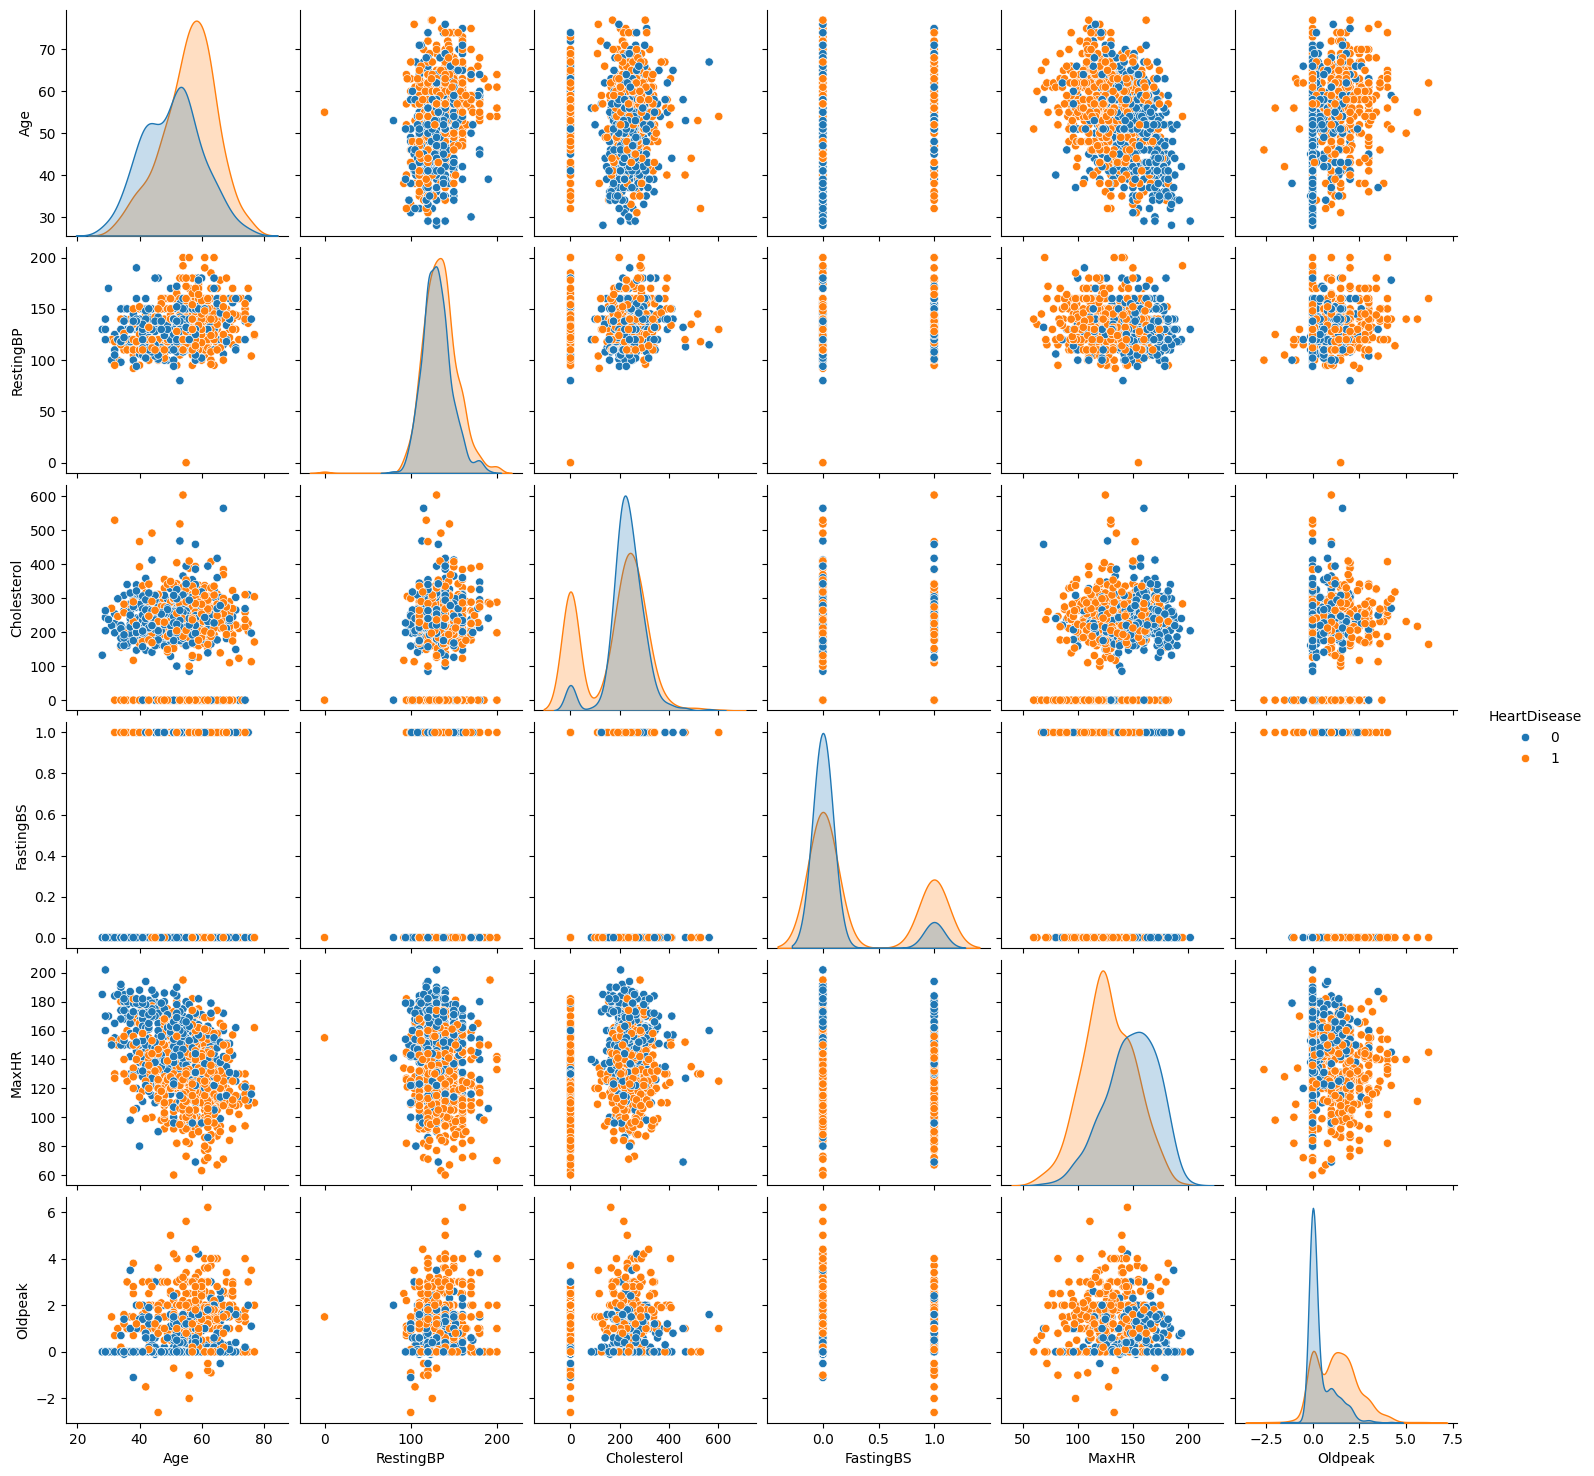

In [61]:
sns.pairplot(df[numericas], hue="HeartDisease")
plt.show()

  <font size="3">  Los 5 predictores más correlacionados con un cor arriba de 0.9) son:
-
-
-
-
-

  <font size="5">   2. Regresion Logística

In [62]:
# Nos centramos solo en variables cuantitativas
X2 = X.drop(columns= ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'])
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.2, random_state=254)

#Estandarizacion
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
#Optimizar Parametros con GridSearchCV para Regresion Logistica
hiperparametros_rl = {
                'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1','l2'],
    }

opt_rl = GridSearchCV( LogisticRegression(random_state=254,max_iter =1000),
    param_grid=hiperparametros_rl,
    cv=5,
    scoring='accuracy'
)
opt_rl.fit(X_train,y_train)

print("Los Mejores hiperparámetros encontrados son:", opt_rl.best_params_)


Los Mejores hiperparámetros encontrados son: {'C': 10, 'penalty': 'l2'}


C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\seba0\AppData\Roaming\Python\Python313\site-p

  <font size="3">  Los mejores hiperparámetros encontrados son

  <font size="5">  3. k-Nearest Neighbours
  

In [76]:
hiperparametros_knn = {
    'n_neighbors': [2,4,6,8,20,100],
}

opt_knn = GridSearchCV(KNeighborsClassifier(),
                       param_grid=hiperparametros_knn,
                       cv=5, 
                       scoring='accuracy')

opt_knn.fit(X_train,y_train)

print("Los Mejores hiperparámetros encontrados son:", opt_knn.best_params_)



Los Mejores hiperparámetros encontrados son: {'n_neighbors': 8}


  <font size="3">  Los mejores hiperparámetros encontrados son

  <font size="5">   4. Comparación de Modelos

In [ ]:
#Predichos con Regresion Logistica
y_pred_rl = opt_rl.predict(X_test)

In [77]:
# Métricas de evaluación regresión logística
accuracy_rl = accuracy_score(y_test, y_pred_rl)
recall_rl = recall_score(y_test, y_pred_rl)

print("Accuracy Regresión Logística", accuracy_rl)
print("Recall Regresión Logística", recall_rl)

Accuracy Regresión Logística 0.717391304347826
Recall Regresión Logística 0.7373737373737373


  <font size="3">  Para el caso de Regresión Logistica, el valor de Recall es igual a 0.7373737373737373, por lo que aproximadamente el 0,74 del total de los pacientes a los que se les predijo una enfermedad cardiaca con el modelo realmente la tuvieron, mientras que el Accuracy del modelo es de 0.717391304347826 por lo que aproximadamente el 0,72 del total de resultados del modelo fueron correctos.

In [78]:
#Predichos con K-Nearest Neighbours
y_pred_knn = opt_knn.predict(X_test)

In [ ]:
# Métricas de evaluación K-Nearest Neighbours
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("Accuracy K-Nearest Neighbours", accuracy_knn)
print("Recall K-Nearest Neighbours", recall_knn)

Accuracy  K-Nearest Neighbours 0.7608695652173914
Recall  K-Nearest Neighbours 0.6868686868686869


  <font size="3">  # Para el caso de K-Nearest Neighbours, el valor de Recall es igual a 0.6868686868686869, por lo que aproximadamente el 0,69 del total de los pacientes a los que se les predijo una enfermedad cardiaca con el modelo realmente la tuvieron, mientras que el valor de Accuracy del modelo es de 0.7608695652173914 por lo que aproximadamente el 0,76 del total de resultados del modelo fueron correctos.

Considerando los resultados, el modelo de K-Nearest Neighbors se ajusta más al total de resultados, sin embargo, tiene un valor más bajo respecto a la cantidad de verdaderos reales a comparacion del modelo de Regresión Logística

In [80]:
cm_rl = confusion_matrix(y_test, y_pred_rl)
cm_knn = confusion_matrix(y_test, y_pred_knn)

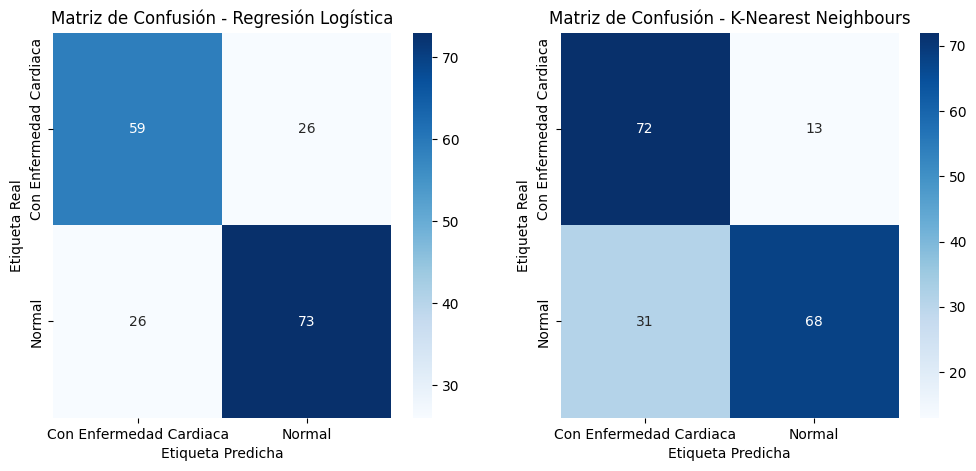

In [87]:
clases = ["Con Enfermedad Cardiaca","Normal"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_rl, annot=True, fmt='d', cmap='Blues', ax=axes[0],xticklabels=clases, yticklabels=clases)
axes[0].set_title('Matriz de Confusión - Regresión Logística')
axes[0].set_ylabel('Etiqueta Real')
axes[0].set_xlabel('Etiqueta Predicha')
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[1],xticklabels=clases, yticklabels=clases)
axes[1].set_title('Matriz de Confusión - K-Nearest Neighbours')
axes[1].set_ylabel('Etiqueta Real')
axes[1].set_xlabel('Etiqueta Predicha')
plt.show()